# The opposite of auto-mpg regression -> classification

This is the sequel of fuel consumption analysis where we were trying to predict the target value 'mpg' with regression techniques. This time I will reverse the purpose of this project and I set 'origin' as the target label. So, all we got now is a classification problem with 3 labels to predict. The data set remains the same.

In Classification, as a supervised learning method, we classify-categorize objects into classes/categories by prediction. In this case, the target label is 'origin'. Every car is characterized by its attributes and we want to predict the origin of the car.

We will explore data again from a different view and we will point out the basic characteristics of every origin. Let's get started and have fun...

In [6]:
# import data
import pandas as pd
data=pd.read_csv('auto-mpg-nameless.csv')
print(data.head(1))
# number of cars per origin
data.origin.value_counts()

    mpg  cyls  displacement     hp  weight   acc  year  origin
0  18.0     8         307.0  130.0  3504.0  12.0    70       1


1    245
3     79
2     68
Name: origin, dtype: int64

In [7]:
for i in range(1,4):
    x=round((len(data.loc[(data['origin']==i)])/len(data.origin)*100),2)
    print('origin',i,'is',x,'% of total number of cars')

origin 1 is 62.5 % of total number of cars
origin 2 is 17.35 % of total number of cars
origin 3 is 20.15 % of total number of cars


As we can see the percentage of origin 1 (US cars) is two times bigger than the sum of origin 2 (EU cars) and 3 (Japanese). This may affect the classification of origin 2 ,maybe and origin 3. Features have only numerical values so this means that we don't need to encode them or get dummies.

At the previous project we saw in data description that our attributes are:
    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    
We are going to plot the discrete attributes with every possible combination...thus we have 2 plots :)



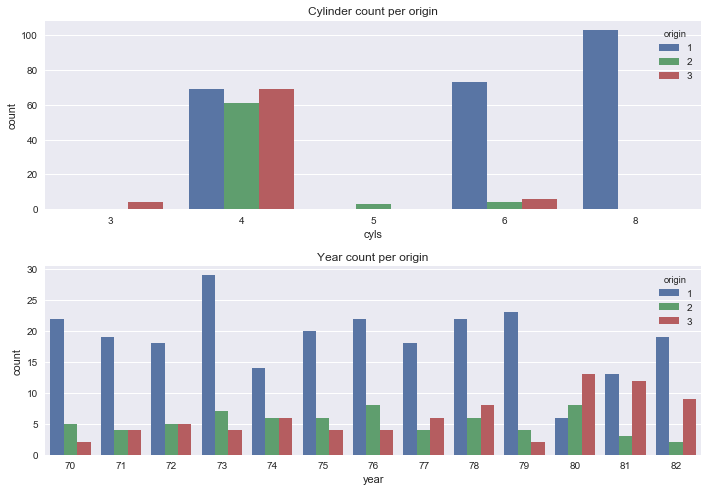

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 7))
plt.subplot(2,1,1)
sns.countplot(x="cyls",hue="origin", data=data);
plt.title("Cylinder count per origin")
plt.subplot(2,1,2)
sns.countplot(x='year',hue="origin",data=data);
plt.title("Year count per origin")
plt.tight_layout()
plt.show()

First thoughts on these charts

First of all 'Cylinder count per origin'...
as we can see, there are values that only one origin exists. Thus, three(3) cylinders have only japanese cars, five(5) cylinders have only european cars and finally eight(8) cylinders have only u.s. cars. The bar for 8-cylinder us cars is bigger than the other two just because there are much more instances in origin 1. This plot is useful because cylinders 3,5 and 8 are indicative of origin 3,2 and 1 respectively. So, for example, a 5-cylinder car can't be either a japanese or a u.s. car.

'Year count per origin'

every year, from 1970 to 1982 each origin can be found over the years. This chart doesn't say much, however with a better analysis maybe we can find something really good ...

#### Next

...my favorite stripplots. I think that I got all the (useful for me) information from these charts! I can see the relationship between two values ordered by origin. Pretty cool for classification problems (and more).
Well, all we need to do is to extract info and create new features that are indicative only for one origin. e.g. the heaviest cars are from u.s.a. If these cars have 8 cylinders then they are definitely from u.s.
This is part of feature engineering ... creating new features from the existing ones! I think this is kinda a riddle and I accept the challenge every time! I didn't say much for feature engineering, although I will make an integrated reference at the lines below. Stay tuned :)

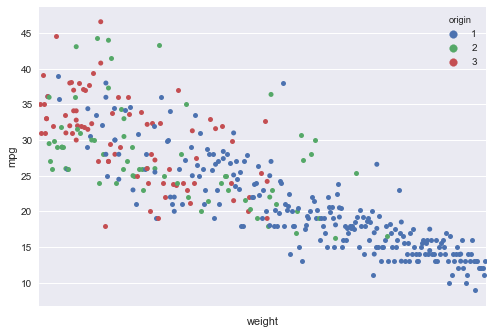

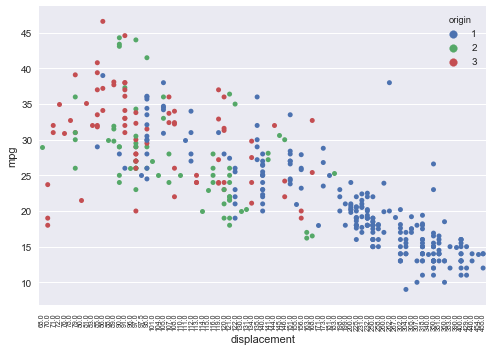

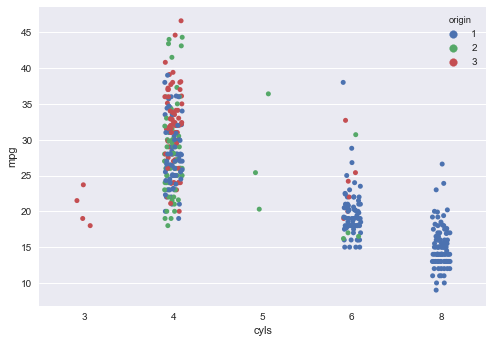

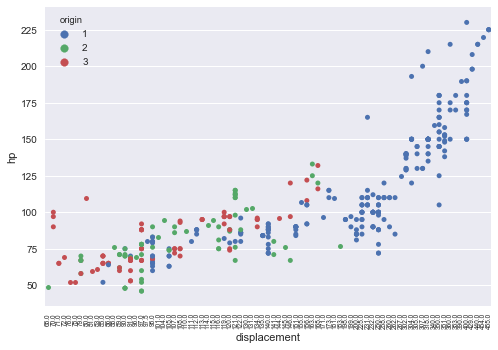

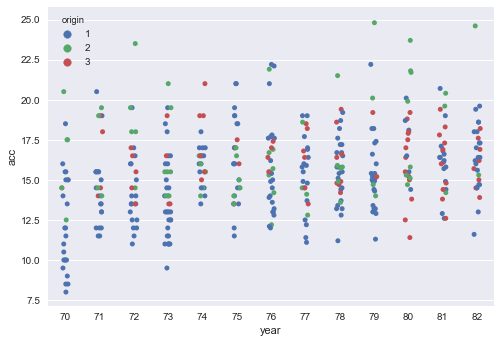

In [9]:

plot=sns.stripplot(x='weight',y='mpg',hue='origin',data=data,size=5.0)
plot.set(xticklabels=[])
plt.xticks(rotation=90)
plt.show()
plot=sns.stripplot(x='displacement',y='mpg',hue='origin',data=data)
plt.xticks(rotation=90,fontsize=7)
plt.show()
plot=sns.stripplot(x='cyls',y='mpg',hue='origin',data=data,jitter=True)
plt.show()
sns.stripplot(x='displacement',y='hp',hue='origin',data=data)
plt.xticks(rotation=90,fontsize=6.5)
plt.show()
sns.stripplot(x='year',y='acc',hue='origin',data=data, jitter =True)
plt.show()

So far so good, but it's time to build a model. This time I choose to work only with Random Forest Classifier. I will not iterate over different algorithms this time. However, you can try different types of supervised machine learning algorithms as a homework. Be careful, some algorithms work for binary classification problems (e.g. Logistic Regression, Decision Trees etc). This one can perform with "multi-labeled" problems.

#### "*Predicton with initial features*"

0.843252452858
0.908163265306
[[62  1  1]
 [ 2 13  3]
 [ 0  2 14]]
             precision    recall  f1-score   support

          1       0.97      0.97      0.97        64
          2       0.81      0.72      0.76        18
          3       0.78      0.88      0.82        16

avg / total       0.91      0.91      0.91        98



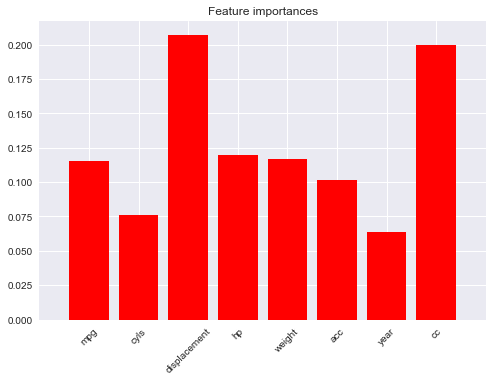

In [10]:
# import packages as usual
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.neighbors import KNeighborsClassifier 

data = pd.read_csv('auto-mpg-nameless.csv')

X=data.iloc[:,0:7]
y=data.iloc[:,7]

data['cc']=np.array(data.displacement)*16.38706
X['cc']=data.cc


X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25 ,random_state=150)

RF=RandomForestClassifier(n_estimators=100,random_state=150)
RF.fit(X_train,y_train)
#conf=RF.score(X_test,y_prob)
#Χ_train ή X και y_train ή y ?
scores = cross_val_score(RF, X, y, cv=10, scoring='accuracy')
y_pred=RF.predict(X_test)
accuracy_RF=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
#print(conf)
print(scores.mean())
print(accuracy_RF)
print(conf_matrix)
print(classification_report(y_test,y_pred))


# feature importances

importances = RF.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances,color="r",align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout
plt.xticks(rotation=45)
plt.show()


Let's talk about what we see here! We have two tables. First one is 'confusion matrix' and the second one 'classification report'. These two tables tell us much more than two numbers. Score, accuracy etc are numbers, but from where these numbers came from. Sometimes "less is more" but at this point, we need more than "less". So let's get it:

#### confusion matrix

according to [wiki](https://en.wikipedia.org/wiki/Precision_and_recall)

"*For classification tasks, the terms true positives, true negatives, false positives, and false negatives compare the results of the classifier under test with trusted external judgments. The terms positive and negative refer to the classifier's prediction (sometimes known as the expectation), and the terms true and false refer to whether that prediction corresponds to the external judgment (sometimes known as the observation).*"

What does this mean for our results? We have a 3x3 table. First column and first row are for origin 1: u.s. cars. Second column and second row are for origin 2: EU cars and third column and third row are for origin 3: Japanese cars.

In [13]:
print(conf_matrix)
print()
for i in range(1,3):
    if i==1:
        print('| TP','FN |')
    else:
        print('| FP','TN |')

[[62  1  1]
 [ 2 13  3]
 [ 0  2 14]]

| TP FN |
| FP TN |


First row


62 u.s. cars predicted as u.s. cars (True Positive)

1 u.s. car prediced as european (False Negative)

1 u.s. car prediced as japanese (False Negative)

Second row

2 EU cars prdicted as u.s. cars (False Negative)

13 EU cars predicted as EU (True Positive)

3 EU cars predicted as japanese (False Negative)

Third row

0 japanese cars predicted as u.s cars (False Negative)

2 japanese cars predicted as EU cars (False Negative)

14 japanese cars predicted as japanese cars (True Positive)


#### classification report

precision & recall

"*...high precision means that an algorithm returned substantially more relevant results than irrelevant ones, while high recall means that an algorithm returned most of the relevant results.*"

"*In a classification task, the **precision** for a class is the number of true positives (i.e. the number of items correctly labeled as belonging to the positive class) divided by the total number of elements labeled as belonging to the positive class (i.e. the sum of true positives and false positives, which are items incorrectly labeled as belonging to the class). **Recall** in this context is defined as the number of true positives divided by the total number of elements that actually belong to the positive class (i.e. the sum of true positives and false negatives, which are items which were not labeled as belonging to the positive class but should have been).*"


Thank you wikipedia for your simplicity!

f1-score

is a measure of a test's accuracy. It considers both the precision and the recall of the test to compute the score.  So **our score is 0.91**. Very good. Really.
But... can this score get improved? To be honest if we want to improve our score and avoid overfitting there are not many things we can do.That's because our data is too small for engineering. However we can try it. We'll never know if we don't give it a shot.


### Feature engineering 
(as an extra-example for future use)

We will :

take every origin one by one  

search and try to find unique characteristics for each one.

First of all, I created 6 groups that they helped me to collect my data.

In [16]:
group1=data.sort_values(['hp','origin'], ascending=[False,False])
group2=data.sort_values(['displacement','origin'], ascending=[False,False])
group3=data.sort_values(['cyls','origin'], ascending=[False,False])
group4=data.sort_values(['acc','origin'], ascending=[False,False])
group5=data.sort_values(['year','origin'], ascending=[False,False])
group6=data.sort_values(['weight','origin'], ascending=[False,False])


Examine stripplots again or create new ones to find what we need.

'displacement-mpg'

cars with displacement 135 or 140 and 4 cylinders are only from U.S. Moreover cars with a displacement more than 183 and 8 cylinders are definitely u.s. cars. There is a green dot (EU car) around 181-189. We must define the 'borders'. So...

In [15]:
group_max = data[['displacement','origin']].groupby(['origin']).max()
print(group_max)

        displacement
origin              
1              455.0
2              183.0
3              168.0


Exactly...Cars with a displacement more than 183 are from the states.

'year-acceleration'

Another one is that cars which are constructed before 1976 and their acceleration is lower than 12.5 m/s^2, are from u.s. too. I think that is pretty clear.

#### EU cars

Same way we try to find 'eu' charachteristics. e.g. from group2 and 'displacement-mpg' chart we have the following rows:

In [18]:
# origin=2
print(data.loc[(data['displacement']>=114)&(data['displacement']<=121)&(data['mpg']<23)&(data['cyls']==4)])


      mpg  cyls  displacement     hp  weight   acc  year  origin          cc
75   18.0     4         121.0  112.0  2933.0  14.5    72       2  1982.83426
76   22.0     4         121.0   76.0  2511.0  18.0    72       2  1982.83426
77   21.0     4         120.0   87.0  2979.0  19.5    72       2  1966.44720
118  20.0     4         114.0   91.0  2582.0  14.0    73       2  1868.12484
119  19.0     4         121.0  112.0  2868.0  15.5    73       2  1982.83426
177  22.0     4         121.0   98.0  2945.0  14.5    75       2  1982.83426
207  19.0     4         120.0   88.0  3270.0  21.9    76       2  1966.44720
240  21.5     4         121.0  110.0  2600.0  12.8    77       2  1982.83426
274  21.6     4         121.0  115.0  2795.0  15.7    78       2  1982.83426


I think that we get the picture. Combining groups and charts we have the desireable result.

#### JP cars

Last but not least , japanese cars! I must say that 'displacement-hp' chart was very helpful! Check group1 and the chart above to find these data:

In [21]:
print(data.loc[(data['displacement']>=70)&(data['displacement']<=78)&(data['hp']>50)|(data['cyls']==3)])

      mpg  cyls  displacement     hp  weight   acc  year  origin          cc
52   31.0     4          71.0   65.0  1773.0  19.0    71       3  1163.48126
53   35.0     4          72.0   69.0  1613.0  18.0    71       3  1179.86832
70   19.0     3          70.0   97.0  2330.0  13.5    72       3  1147.09420
110  18.0     3          70.0   90.0  2124.0  13.5    73       3  1147.09420
129  32.0     4          71.0   65.0  1836.0  21.0    74       3  1163.48126
142  31.0     4          76.0   52.0  1649.0  16.5    74       3  1245.41656
241  21.5     3          80.0  110.0  2720.0  13.5    77       3  1310.96480
244  32.8     4          78.0   52.0  1985.0  19.4    78       3  1278.19068
331  23.7     3          70.0  100.0  2420.0  12.5    80       3  1147.09420


##### Finaly
To be honest I don't want to repeat myself. Anyone can set borders to data like the code below. It is a matter of patience and keeping a sharp eye. Thus, I write down all the possible features that can be used to improve our score like I said before. After hard work I conclude to these:

In [25]:
# 20 new features

# us cars new features
data['us1']=np.where(((data['cyls']==4)&((data['displacement']==135)|(data['displacement']==140))),1,0)
data['us2']=np.where(((data['acc']>16.7)&(data['acc']<19.6)&(data['cyls']==6)),1,0)
data['us3']=np.where(((data['displacement']>183)&(data['cyls']==8)),1,0)
data['us4']=np.where(((data['cyls']==8)&((data['year']==70)|(data['year']==73)|(data['year']==77)|(data['year']==79))),1,0)
data['us5']=np.where(((data['acc']<12.5)&(data['year']<76)),1,0)

# eu cars new features
data['eu1']=np.where(((data['displacement']>=114)&(data['displacement']<=121)&(data['mpg']<23)&(data['cyls']==4)),1,0)
data['eu2']=np.where((((data['hp']<50)|(data['hp']>102))&(data['cyls']==4)),1,0)
data['eu3']=np.where((((data['acc']>=22.5)|(data['acc']==15.5)|(data['acc']==14)|((data['acc']>=21.5)&(data['acc']<=21.9)))&(data['cyls']==4)),1,0)
data['eu4']=np.where(((data['weight']>3100)&((data['cyls']==4)|(data['cyls']==5))),1,0)
data['eu5']=np.where(((data['hp']==71)&(data['cyls']==4)),1,0)
data['eu6']=np.where((((data['cyls']==4)&(data['weight']<=2190)&(data['weight']>=2188))),1,0)
data['eu7']=np.where(((data['mpg']<30)&(data['weight']<1955)),1,0)

# japanese cars new features
data['jp1']=np.where((((data['displacement']>=70)&(data['displacement']<=78)&(data['hp']>50))|(data['cyls']==3)),1,0)
data['jp2']=np.where(((((data['displacement']>=81)&(data['displacement']<=85))|(data['displacement']==107)|(data['displacement']==108))&(data['mpg']>30)),1,0)
data['jp3']=np.where(((data['hp']==67)&((data['displacement']==91)|(data['displacement']==97))),1,0)
data['jp4']=np.where(((data['hp']==75)&(data['displacement']>=97)&(data['displacement']<116)),1,0)
data['jp5']=np.where(((data['hp']==88)&(data['displacement']==97)),1,0)
data['jp6']=np.where(((data['hp']==97)&(data['mpg']>18)),1,0)
data['jp7']=np.where(((data['hp']>=92)&(data['hp']<=94)&(data['displacement']<140)),1,0)
data['jp8']=np.where(((data['cyls']==4)&(data['hp']<66)&(data['weight']<=1800)),1,0)

print(data.head(2))

    mpg  cyls  displacement     hp  weight   acc  year  origin          cc  \
0  18.0     8         307.0  130.0  3504.0  12.0    70       1  5030.82742   
1  15.0     8         350.0  165.0  3693.0  11.5    70       1  5735.47100   

   us1 ...   eu6  eu7  jp1  jp2  jp3  jp4  jp5  jp6  jp7  jp8  
0    0 ...     0    0    0    0    0    0    0    0    0    0  
1    0 ...     0    0    0    0    0    0    0    0    0    0  

[2 rows x 29 columns]


If accidentally, for example, a u.s. car characterized as european it is provided a script below, which can check if something went wrong. Find its index and fix the problem if it is possible.

In [27]:
def check_us(column1):
    for i in data.index:
        if data.origin[i] == data[column1][i]:
            print('us',data.index[i])
        elif data.origin[i] != 1 & data[column1][i]==1:
            print('not us',data.index[i])
    return(column1)

for i in ('us1','us2','us3','us4','us5'):
    print(i)
    print()
    check_us(i)
    print()
    
def check_eu(column2):
    for i in data.index:
        if data.origin[i]==2 and data[column2][i]==1:
            print('eu',data.index[i])
        elif data.origin[i] != 2 & data[column2][i]==1:
            print('not eu',data.index[i])
    return(column2)

for i in ('eu1','eu2','eu3','eu4','eu5','eu6','eu7'):
    print(i)
    print()
    check_eu(i)
    print()
  
def check_jp(column3):
    for i in data.index:
        if data.origin[i]==3 and data[column3][i]==1:
            print('jp',data.index[i])
        elif data.origin[i] != 3 & data[column3][i]==1:
            print('not jp',data.index[i])

for i in ('jp1','jp2','jp3','jp4','jp5','jp6','jp7','jp8'):
    print(i)
    print()
    check_jp(i)


us1

us 30
us 45
us 59
us 108
us 130
us 166
us 168
us 182
us 204
us 234
us 253
us 280
us 312
us 334
us 338
us 366
us 368
us 385
us 387
us 389

us2

us 97
us 126
us 131
us 132
us 153
us 159
us 160
us 161
us 174
us 191
us 192
us 197
us 200
us 224
us 225
us 226
us 250
us 251
us 254
us 255
us 258
us 279
us 281
us 314
us 360
us 381

us3

us 0
us 1
us 2
us 3
us 4
us 5
us 6
us 7
us 8
us 9
us 10
us 11
us 12
us 13
us 25
us 26
us 27
us 28
us 37
us 38
us 39
us 40
us 41
us 42
us 43
us 61
us 62
us 63
us 64
us 65
us 66
us 67
us 68
us 69
us 71
us 72
us 73
us 74
us 84
us 85
us 86
us 87
us 88
us 89
us 90
us 91
us 92
us 93
us 94
us 95
us 102
us 103
us 104
us 105
us 114
us 115
us 120
us 123
us 134
us 135
us 136
us 137
us 138
us 154
us 155
us 156
us 157
us 163
us 164
us 185
us 186
us 187
us 188
us 206
us 210
us 211
us 212
us 213
us 219
us 220
us 221
us 222
us 227
us 228
us 229
us 230
us 247
us 248
us 249
us 260
us 262
us 263
us 283
us 284
us 285
us 286
us 287
us 288
us 289
us 290
us 296
us 298
us 359

us4

### Summary - Conclusion

A few words as an epilog. This was a small project about supervised machine learning (classification). Of course, there are much more things to do with data. Such as cleaning data, dropping or filling missing values (NA's), encoding attributes (convert strings or characters to numbers). Our data set was quite small and "clean". Although our data analysis was constructive (and always should be that way ). Finally, our prediction's accuracy was high as a result of our work.At the end I left some promises for the future... so see you around!